In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Data information

| Feature          | Description                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------|
| Age              | The age of the patient in years                                                                       |
| Sex              | The sex of the patient (1 = male; 0 = female)                                                          |
| ChestPainType    | The type of chest pain experienced by the patient (typical angina, atypical angina, non-anginal pain, asymptomatic) |
| RestingBP        | The patient's resting blood pressure (mm Hg on admission to the hospital)                               |
| Cholesterol      | The patient's serum cholesterol measurement in mg/dl                                                   |
| FastingBS        | The patient's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)                                    |
| RestingECG       | Resting electrocardiographic measurement (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) |
| MaxHR            | The patient's maximum heart rate achieved                                                              |
| ExerciseAngina   | Exercise-induced angina (1 = yes; 0 = no)                                                               |
| Oldpeak          | ST depression induced by exercise relative to rest                                                      |
| ST_Slope         | The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)                    |
| HeartDisease     | The presence of heart disease (1 = yes, 0 = no)                                                         |


In [3]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [7]:
df.describe(include='all').T

count unique     top freq        mean         std   min  \
Age             918.0    NaN     NaN  NaN   53.510893    9.432617  28.0   
Sex               918      2       M  725         NaN         NaN   NaN   
ChestPainType     918      4     ASY  496         NaN         NaN   NaN   
RestingBP       918.0    NaN     NaN  NaN  132.396514   18.514154   0.0   
Cholesterol     918.0    NaN     NaN  NaN  198.799564  109.384145   0.0   
FastingBS       918.0    NaN     NaN  NaN    0.233115    0.423046   0.0   
RestingECG        918      3  Normal  552         NaN         NaN   NaN   
MaxHR           918.0    NaN     NaN  NaN  136.809368   25.460334  60.0   
ExerciseAngina    918      2       N  547         NaN         NaN   NaN   
Oldpeak         918.0    NaN     NaN  NaN    0.887364     1.06657  -2.6   
ST_Slope          918      3    Flat  460         NaN         NaN   NaN   
HeartDisease    918.0    NaN     NaN  NaN    0.553377    0.497414   0.0   

                   25%    50%    75%    max  
Age               47.0   54.0   60.0   77.0  
Sex                NaN    NaN    NaN    NaN  
ChestPainType      NaN    NaN    NaN    NaN  
RestingBP        120.0  130.0  140.0  200.0  
Cholesterol     173.25  223.0  267.0  603.0  
FastingBS          0.0    0.0    0.0    1.0  
RestingECG         NaN    NaN    NaN    NaN  
MaxHR            120.0  138.0  156.0  202.0  
ExerciseAngina     NaN    NaN    NaN    NaN  
Oldpeak            0.0    0.6    1.5    6.2  
ST_Slope           NaN    NaN    NaN    NaN  
HeartDisease       0.0    1.0    1.0    1.0

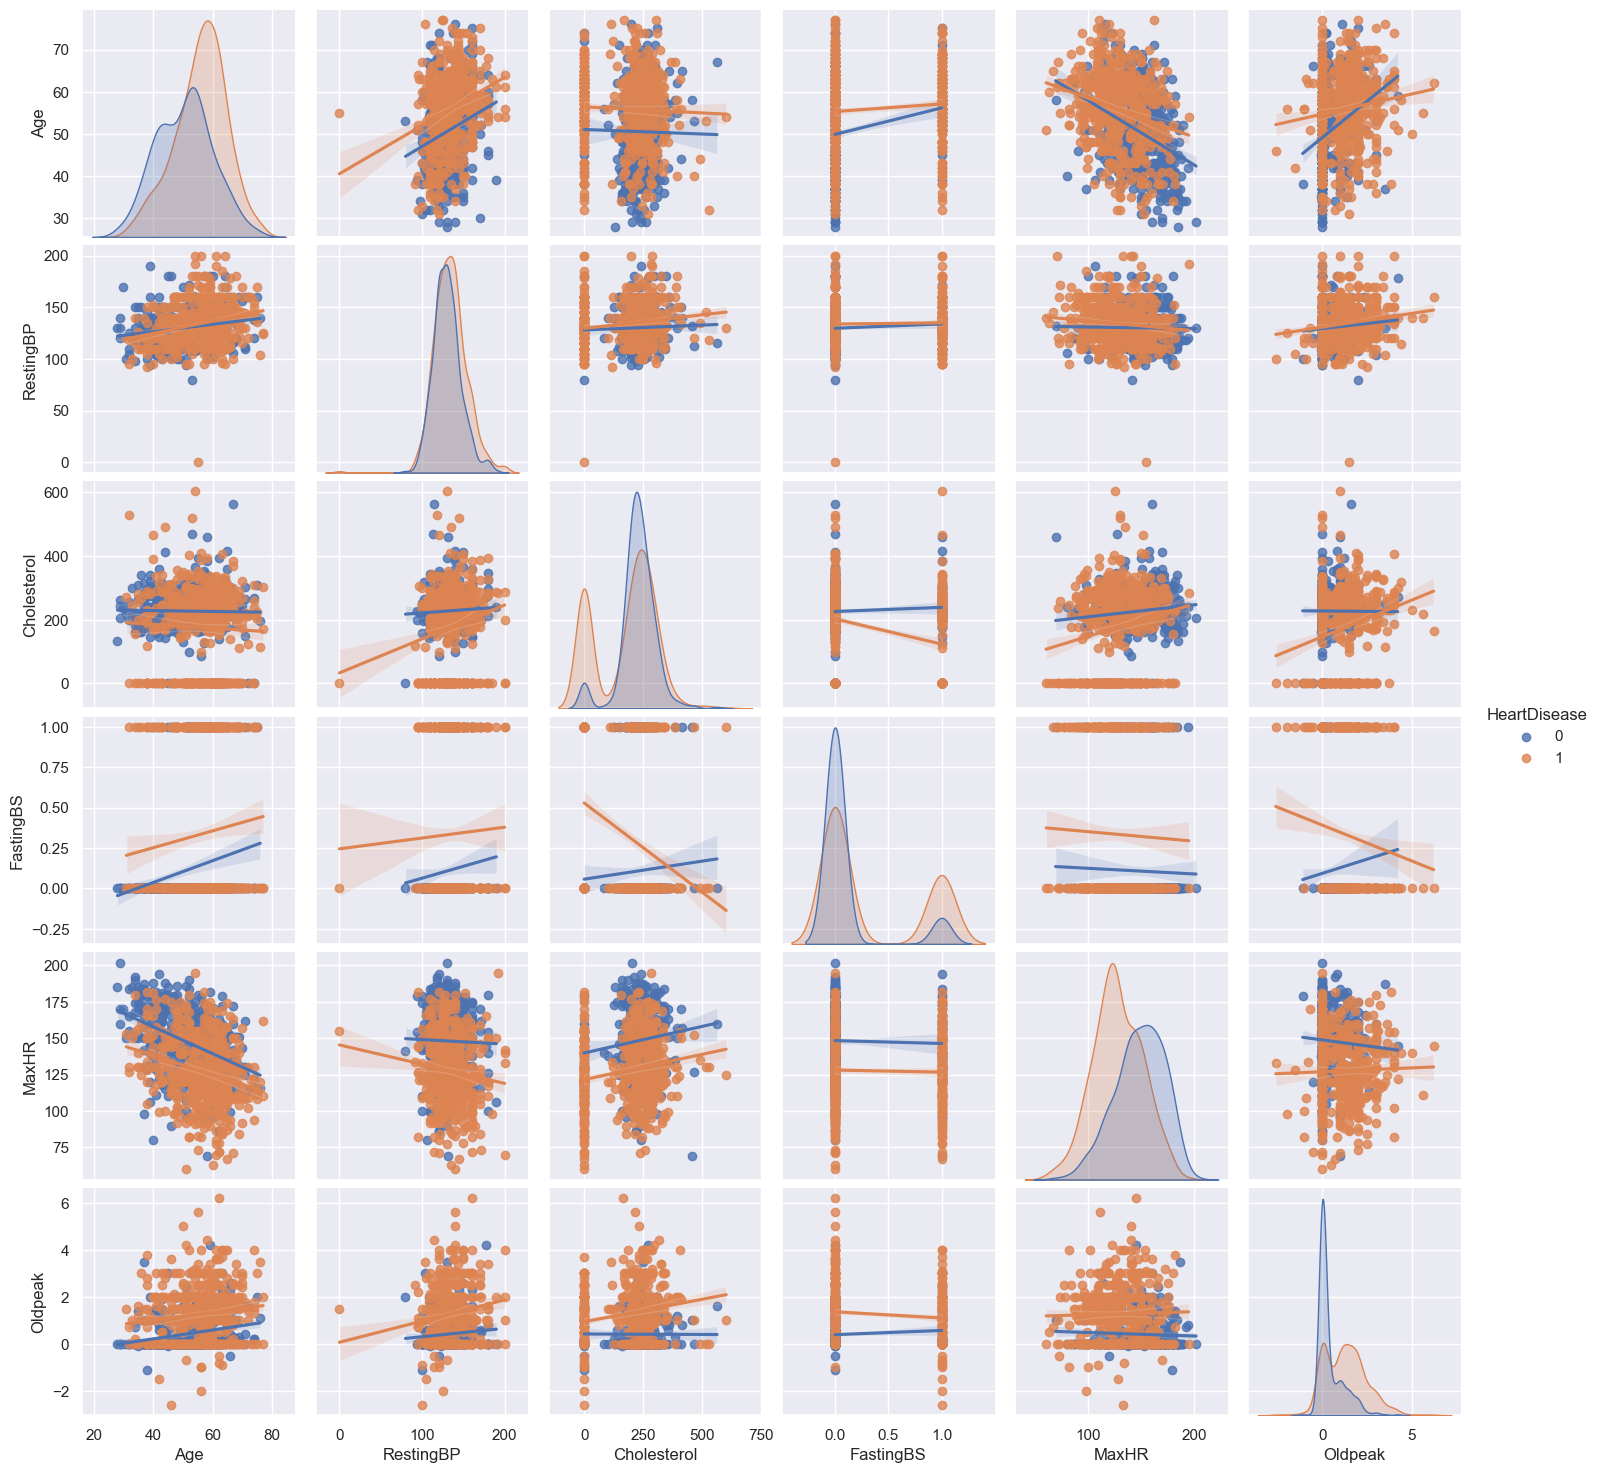

In [9]:
# Correlation pairplot
sns.set()
sns.pairplot(df, hue='HeartDisease', kind='reg')

In [10]:
print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values for categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


# EDA

**1)What is the proportion of patients with heart disease in our dataset?**

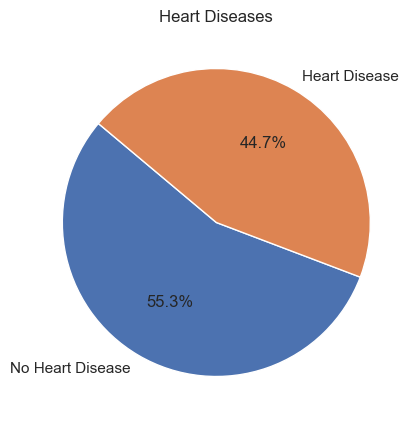

In [14]:
heart_disease_counts = df['HeartDisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(5,5))
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Diseases')
plt.show()

Skewness Value : -0.19593302867569365


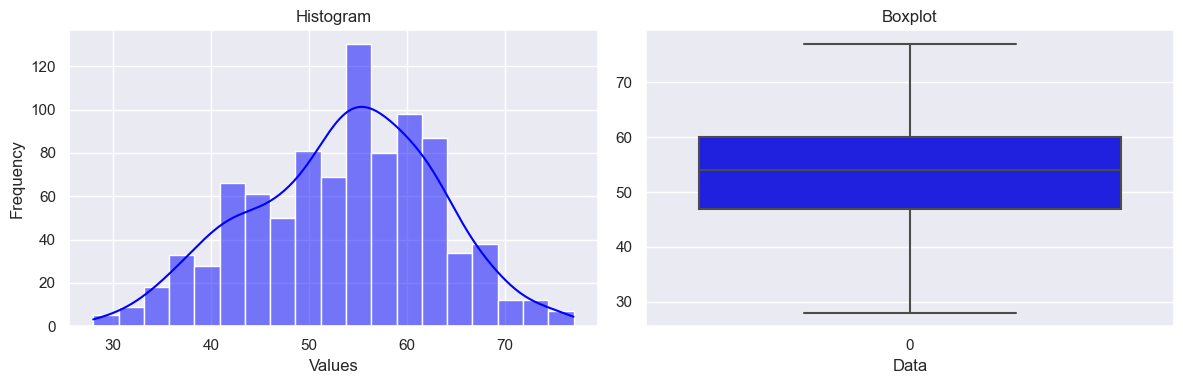

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Age'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Age'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Age'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.1798393100516288


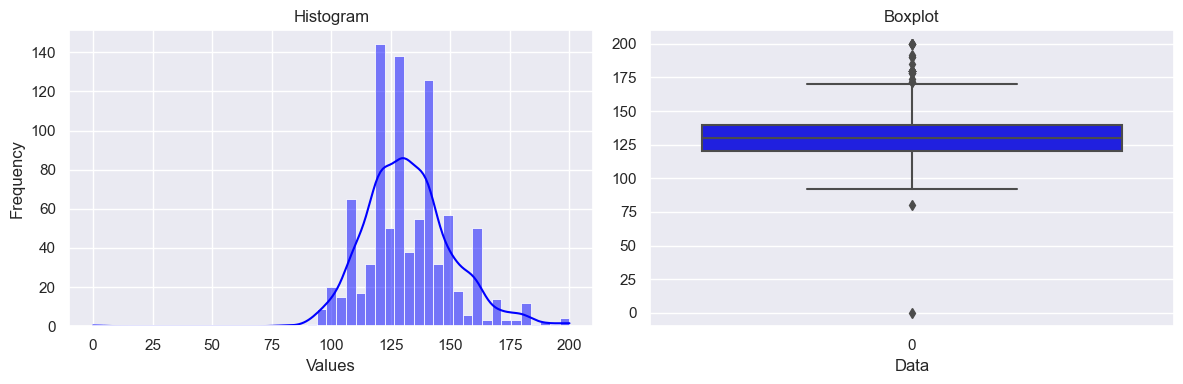

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['RestingBP'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['RestingBP'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['RestingBP'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : -0.6100864307268192


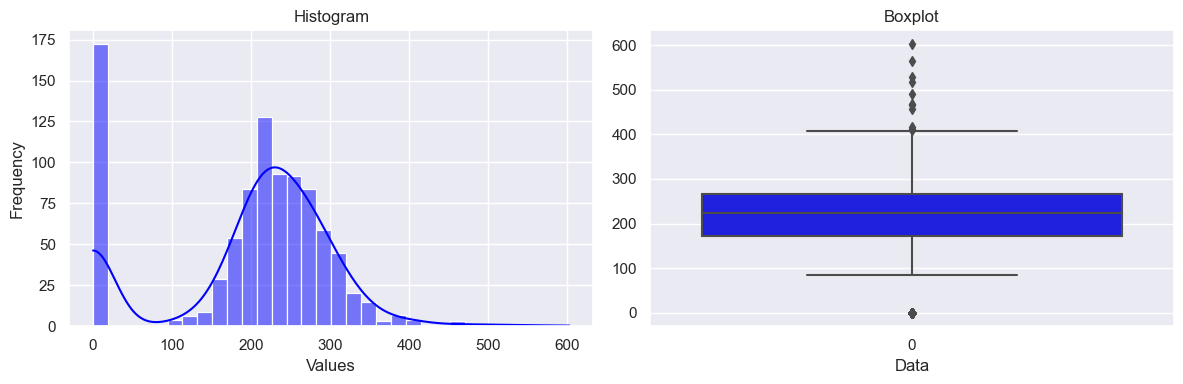

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Cholesterol'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Cholesterol'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Cholesterol'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : -0.14435941846180994


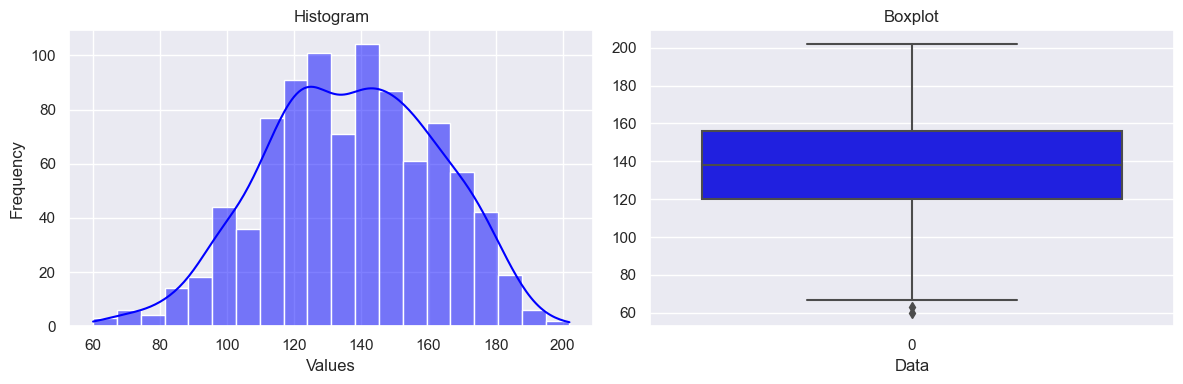

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['MaxHR'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['MaxHR'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['MaxHR'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 1.0228720218107528


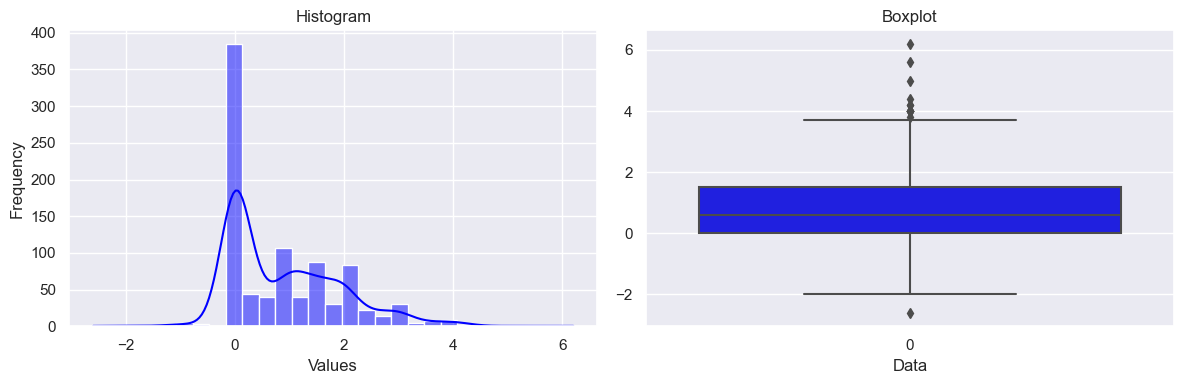

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Oldpeak'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Oldpeak'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Oldpeak'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Data Preprocessing

In [26]:
print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values for categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [29]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [33]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

df['Sex'] = encoder.fit_transform(df[['Sex']])
df['ChestPainType'] = encoder.fit_transform(df[['ChestPainType']])
df['ExerciseAngina'] = encoder.fit_transform(df[['ExerciseAngina']])
df['ST_Slope'] = encoder.fit_transform(df[['ST_Slope']])
df['RestingECG'] = encoder.fit_transform(df[['RestingECG']])

In [44]:
df.head(2)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40  1.0            1.0        140          289          0         1.0   
1   49  0.0            0.0        160          180          0         1.0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172             0.0      0.0       0.0             0  
1    156             0.0      1.0       1.0             1

# Model Building

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression

In [54]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8651226158038147
Test Accuracy Score : 0.8478260869565217
Cross validation Score : 0.8147956759325256
confusion matrix :
 [[66 11]
 [17 90]]
classification Report :
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# KNN

In [56]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8937329700272479
Test Accuracy Score : 0.8478260869565217
Cross validation Score : 0.6622297457828463
confusion matrix :
 [[64 13]
 [15 92]]
classification Report :
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



# Support Vector Machine (SVM)

In [57]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8978201634877384
Test Accuracy Score : 0.8586956521739131
Cross validation Score : 0.6829650748396293
confusion matrix :
 [[64 13]
 [13 94]]
classification Report :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



# Decision Tree Classifier

In [48]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=DecisionTreeClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.8097826086956522
Cross validation Score : 0.744951294844381
confusion matrix :
 [[63 14]
 [21 86]]
classification Report :
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        77
           1       0.86      0.80      0.83       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



# Randome Forest classifier

In [49]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=RandomForestClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.875
Cross validation Score : 0.8093311950582086
confusion matrix :
 [[66 11]
 [12 95]]
classification Report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Ada boost Classifier

In [50]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8910081743869209
Test Accuracy Score : 0.8206521739130435
Cross validation Score : 0.8093371347113327
confusion matrix :
 [[64 13]
 [20 87]]
classification Report :
               precision    recall  f1-score   support

           0       0.76      0.83      0.80        77
           1       0.87      0.81      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



# Gradient Boost Classifier

In [51]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=GradientBoostingClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.946866485013624
Test Accuracy Score : 0.8532608695652174
Cross validation Score : 0.8169101924447613
confusion matrix :
 [[64 13]
 [14 93]]
classification Report :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.88      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# Exstrem gradient boosting Classifier (XGB)

In [52]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=XGBClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.8641304347826086
Cross validation Score : 0.7983903540033261
confusion matrix :
 [[66 11]
 [14 93]]
classification Report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# hence we choose Logistic regresion as final model

In [58]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

"""
pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8678474114441417
Test Accuracy Score : 0.842391304347826
Cross validation Score : 0.8147956759325256
confusion matrix :
 [[65 12]
 [17 90]]
classification Report :
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [11]:
x=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

tf1 = ColumnTransformer([('Encoder', OneHotEncoder(sparse=False,drop='first'), 
                          [1,2,6,8,10])],remainder='passthrough')
tf2 = ColumnTransformer([('Scaler', StandardScaler(), slice(0, 10))])
tf3=LogisticRegression()
pipe=make_pipeline(tf1,tf2,tf3)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_pred,y_test)

0.8315217391304348

In [12]:
import pickle

In [13]:
pickle.dump(pipe,open('Heart.pkl','wb'))

In [14]:
Heart_Disease_model=pickle.load(open('Heart.pkl','rb'))
test_input =[40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up']
test_input = np.array(test_input).reshape(1, -1)
output=Heart_Disease_model.predict(test_input)
output = Heart_Disease_model.predict(test_input)

if output == 1:
    print("The patient does not have Heart Disease.")
else:
    print("The patient has Heart Disease.")

The patient has Heart Disease.
